In [1]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest


In [2]:
data = pd.read_csv("creditcard.csv")
print("First 5 rows:\n", data.head())
print("\nData Info:\n", data.info())
print("\nClass Distribution:\n", data['Class'].value_counts())


First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [3]:
# Scale Amount column
scaler = StandardScaler()
data['Amount_scaled'] = scaler.fit_transform(data[['Amount']])
# Drop unnecessary columns
data = data.drop(['Time','Amount'], axis=1)


In [4]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [5]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.65      0.70       148

    accuracy                           1.00     85443
   macro avg       0.88      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.8241484640746027


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))




=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.8513337653263792


In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("\n=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_nb))



=== Naive Bayes ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.80      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.89      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC-AUC: 0.8911412775692628


In [8]:
iso = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iso.fit_predict(X_test)
# Isolation Forest returns -1 for outliers
y_pred_iso = [1 if i==-1 else 0 for i in y_pred_iso]

print("\n=== Isolation Forest ===")
print(classification_report(y_test, y_pred_iso))



=== Isolation Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.27      0.16      0.20       148

    accuracy                           1.00     85443
   macro avg       0.63      0.58      0.60     85443
weighted avg       1.00      1.00      1.00     85443



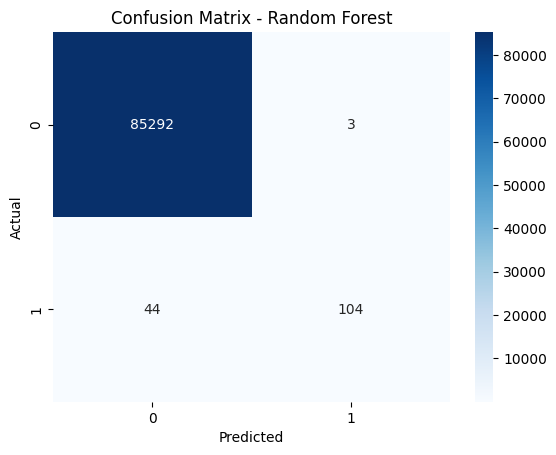

In [9]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


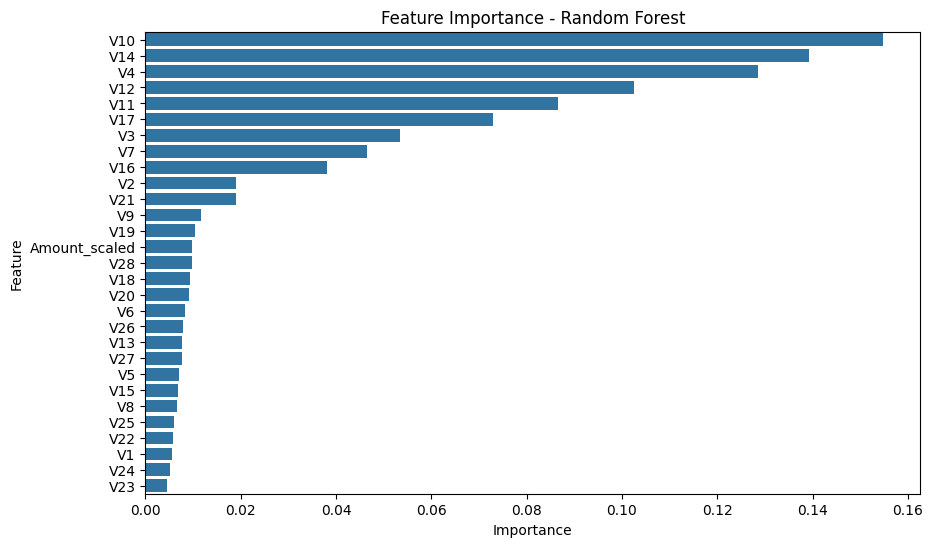

In [10]:
importances = rf.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance - Random Forest")
plt.show()
